# **Personal Information**
- Class: Programming for Data Science - 23KHDL
- Full name: Trầm Hữu Nhân
- ID: 23127442

## Librabries

In [1]:
import sys
import os
import numpy as np

sys.path.append(os.path.abspath('..'))

from src.data_processing import *
from src.visualization import *

## Setup

In [2]:
os.environ["PYTHONUTF8"] = "1"

%reload_ext autoreload
%autoreload 2

DATA_PATH = '../data/raw/aug_train.csv'

## Read CSV File

In [3]:
data = load_dataset(DATA_PATH)

Load successfully!


## Dataset Overview


### Context
A company which is active in Big Data and Data Science wants to hire data scientists among people who successfully pass some courses which conduct by the company. Many people signup for their training. Company wants to know which of these candidates are really wants to work for the company after training or looking for a new employment because **it helps to reduce the cost and time as well as the quality of training or planning the courses and categorization of candidates**. Information related to demographics, education, experience are in hands from candidates signup and enrollment.

### Data Dictionary


In [4]:
get_data_dictionary(data)

-------------------------------------------------------------------------------------------------------------------
Feature Name              | Description                                   | Unit                 | Data Type      
-------------------------------------------------------------------------------------------------------------------
enrollee_id               | Unique ID for candidate                       | ID                   | int64          
city                      | City code                                     | Code                 | <U8            
city_development_index    | Development index of the city (scaled)        | Index (Float)        | float64        
gender                    | Gender of candidate                           | Category             | <U6            
relevent_experience       | Relevant experience of candidate              | Category             | <U23           
enrolled_university       | Type of University course enrolled            | Ca

### Dataset Overview

In [5]:
get_dataset_info(data)

Samples (rows): 19158

Number of Features (columns): 14

Features: ['enrollee_id', 'city', 'city_development_index', 'gender', 'relevent_experience', 'enrolled_university', 'education_level', 'major_discipline', 'experience', 'company_size', 'company_type', 'last_new_job', 'training_hours', 'target']

First 3 lines:
Line 0: (8949, 'city_103', 0.92, 'Male', 'Has relevent experience', 'no_enrollment', 'Graduate', 'STEM', '>20', '', '', '1', 36, 1.0)
Line 1: (29725, 'city_40', 0.7759999999999999, 'Male', 'No relevent experience', 'no_enrollment', 'Graduate', 'STEM', '15', '50-99', 'Pvt Ltd', '>4', 47, 0.0)
Line 2: (11561, 'city_21', 0.624, '', 'No relevent experience', 'Full time course', 'Graduate', 'STEM', '5', '', '', 'never', 83, 0.0)


### Data Information
- `Data Types`: show the data type of each feature
- `Duplicated`: the number of duplicated sample (row), I will compare based on `enrollee_id`
- `Missing State`: the number of missing sample (row) - a sample is said to be missing when it does not have values ​​for all features.
- `Valid`: the validity for numerical feature
- `Statistics`: like `min - max - mean - median ` for numerical feature

In [6]:
if data is not None:
    check_datatype(data)
    check_duplicated(data)
    check_missing_stats(data)
    check_valid(data)
    satistics(data)

✅Data Types
--------------------------------------------------
Feature                   | Type      
--------------------------------------------------
enrollee_id               | int64
city                      | <U8
city_development_index    | float64
gender                    | <U6
relevent_experience       | <U23
enrolled_university       | <U16
education_level           | <U14
major_discipline          | <U15
experience                | <U3
company_size              | <U9
company_type              | <U19
last_new_job              | <U5
training_hours            | int64
target                    | float64

✅Number of Duplicates: 0

✅Missing State
--------------------------------------------------
Feature                   | Count     
--------------------------------------------------
gender                    | 4508      
enrolled_university       | 386       
education_level           | 460       
major_discipline          | 2813      
experience                | 65        
comp

## Data Visualization

### Proportion of employees staying vs. employees leaving

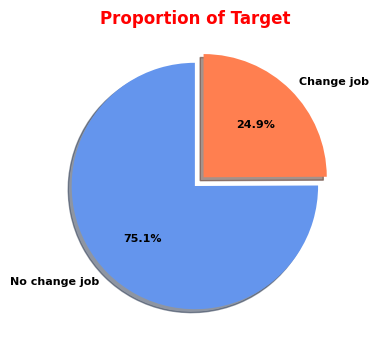

In [7]:
if data is not None:
    plot_target_distribution(data)

**Conclusion**:
- The distribution ratio is ~25% (Job change) vs ~75% (No job change). This ratio progresses 1:3. That is, 4 people register for the course, only 1 person is really qualified to recruit.

- **Problem:** The company is spending on training and profile management for 100% of people, but 75% of them (the blue group) only study for knowledge and then return to their old company or do other work. This is a wasted resource if the ultimate goal of the course is "Recruitment".

$\Rightarrow$ **Opportunity:** If your model can filter out this 25% group from the beginning, the company can focus more on taking care of and save marketing/training costs for the group that is not in need.

### Categorical features vs. target

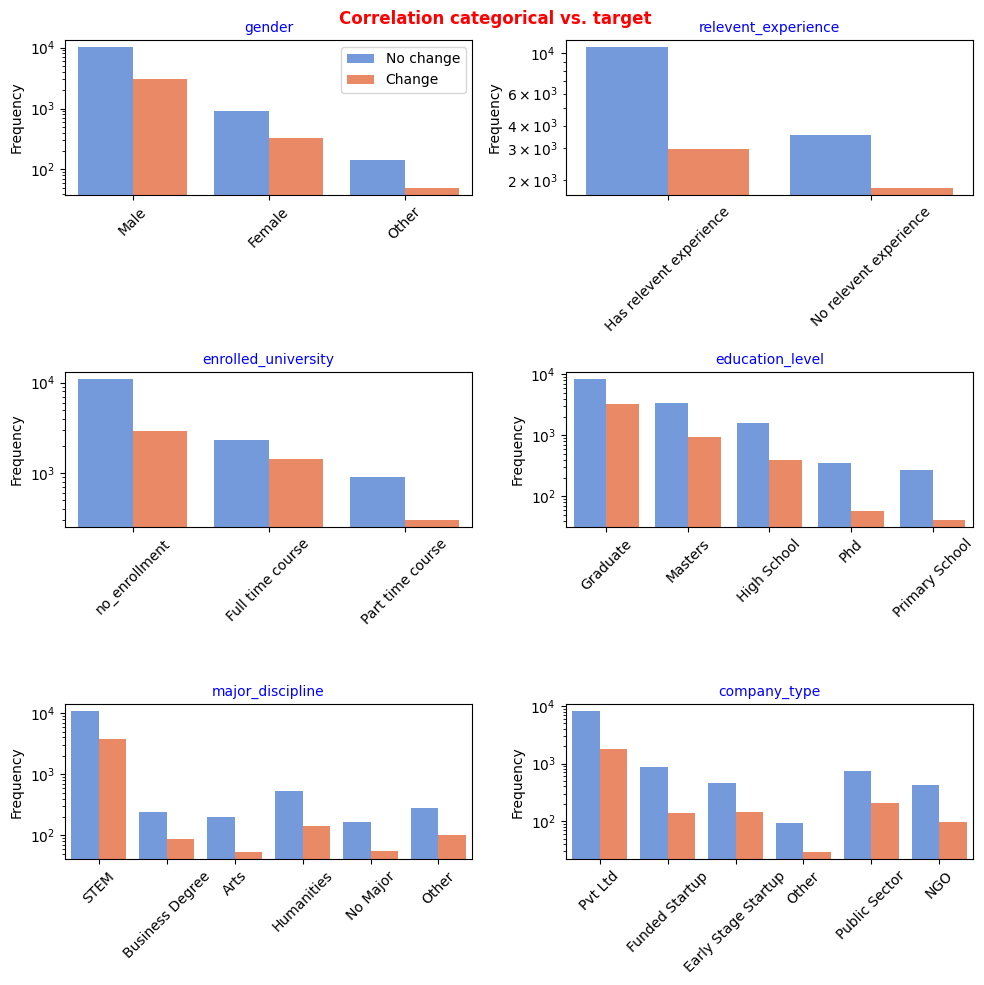

In [8]:
if data is not None:
    plot_categorical_vs_target(data)                # has little value

**Object group: High Potential Churners**
- In the `enrolled_university` chart, the **"Full time course"** group has the highest ratio of orange (Change) to blue (No change) columns among the groups.
    
    $\Rightarrow$ People who are studying full time are usually students about to graduate or unemployed people who spend time going back to school. Their motivation to find a job is the highest and most urgent.

- In the `relevant_experience` chart, the **"No relevant experience"** group has almost the same number of job-hoppers as the experienced group.

    $\Rightarrow$ "Career Switchers": These may be people who are working in a different field and want to switch to Data Science. They take the course not to supplement their current job, but to escape their current job. This is a very accessible target group.

**Object group: Background Bias**
- In the `major_discipline` chart, The **STEM** column completely dominates other industries (Business, Arts...)
    
    $\Rightarrow$ Instead of having many small columns (Arts, Humanities, No Major...), group them all into 2 groups: "STEM" and "Non-STEM". This helps reduce noise and makes the model "easier to learn"

- In the `education_level` chart, In the **Graduate, Masters,** and **High School** columns, the ratio between the two groups is almost the same compared to **Phd** and **Primary School**.

    $\Rightarrow$ In the first 3 groups, because they already have basic knowledge, the tendency is to want to find a job that suits their abilities or need to learn more to do their current job well (which is understandable), and for the remaining 2 groups, because their knowledge is too high/too low, the tendency for them not to change jobs is very high.

**Object group: Environmental Factors**
- In the `company_type` chart, The **"Pvt Ltd"** group is in the majority. However, the **"Funded Startup"** and **"Early Stage Startup"** groups. Although the number is small (low column), the ratio between the two groups seems to be high.
    
    $\Rightarrow$ Startup employees are often more volatile (due to stressful environments, or unstable companies) than public sector employees (the group that often seeks stability).

**Object group: Gender**
- In the `gender` chart, Males are the majority, but the job-hopping rate (orange/green ratio) between Males and Females looks quite similar.
    
    $\Rightarrow$ Gender may not be a strong predictor.

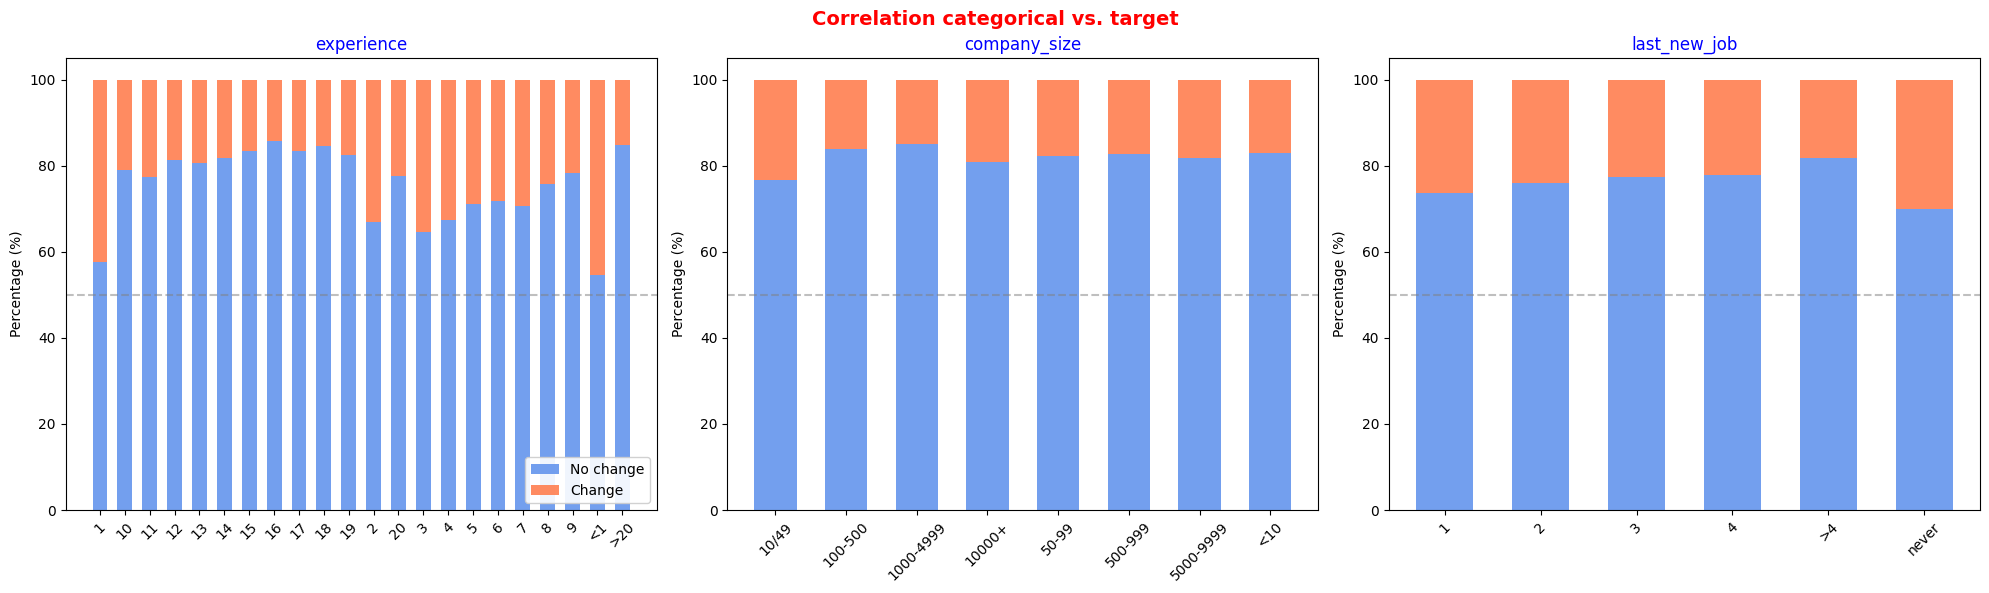

In [9]:
if data is not None:
    plot_categorical_vs_target_stacked(data)        # has much value

**Rule of Job Hopping**
- In the `experience` chart, Columns representing **low years** (like <1, 1, 2, 3), you will see the orange part takes up a very high percentage (around 35-45%).

    $\Rightarrow$ **Junior**: Those with less than 5 years of experience are the most unstable group. They are in the accumulation phase, wanting to change jobs to increase salary or get promoted quickly.

    $\Rightarrow$  **Senior**: The more experience they have, the less likely they are to change jobs. They prioritize stability or hold management positions that are difficult to replace.

**Company Size**
- In the `company_szie` chart, **Small companies** (<10, 10/49) have a significantly higher orange color than **Large companies** (1000-4999, 5000-9999, 10000+).

    $\Rightarrow$ **Start-ups/SMEs** are “Transfer Stations”: Employees at small companies often have to do many things (overworked) but benefits may not be good, leading them to see this as a place to gain experience to move to a larger company. 

    $\Rightarrow$  **Big Corp** retains people better: Large companies have a stable promotion process and benefits (higher retention rate).

**The Paradox of Loyalty**
- In the `last_new_job` chart, The group that never changed jobs or once had a higher rate of job change than those who had had many jobs (2,3,4, >4)

    $\Rightarrow$ **Fresher/New Grads** are people who have just started working at the first or second company, after a period of time they may find their current job is not suitable or want to find a new challenge.

    $\Rightarrow$ **Loyalist** are peopel who have changed jobs many times, after going through many jobs, their current job may be suitable and they have no desire to change.


### Numerical features vs. target

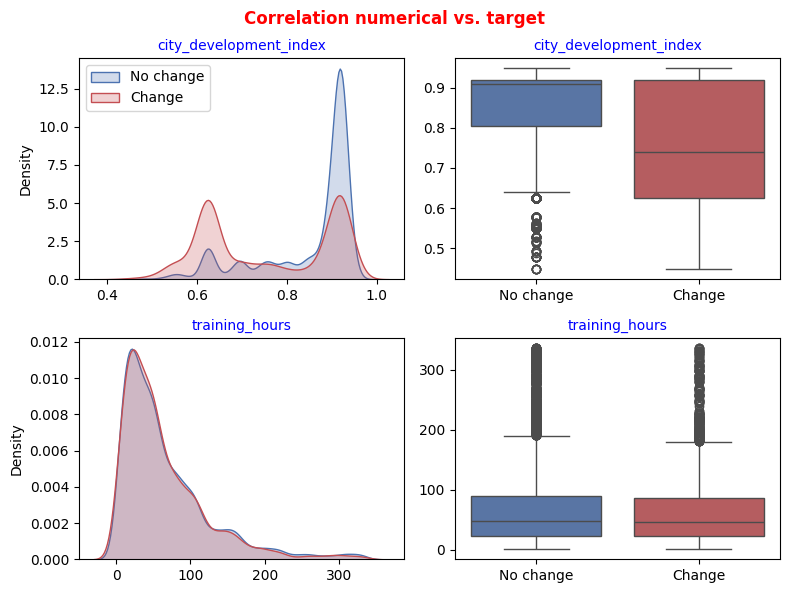

In [10]:
if data is not None:
    plot_numerical_vs_target(data)

**City Development Index**
- In the `city_development_index` chart, **No job change** group has extremely dense concentration at high CDI threshold (~0.9). **Job change** group has 2 distinct peaks. A small peak at 0.9 (same as blue group) but a very large peak at around 0.6.

    $\Rightarrow$ **Comfort Zone**  (CDI > 0.85): Candidates living in highly developed cities (such as San Francisco, London...) tend to be highly stable. They are satisfied with their current living environment and opportunities.

    $\Rightarrow$ **Hunger Zone** (CDI ~ 0.6): Candidates in developing (or underdeveloped) cities have a strong motivation to learn Data Science to change their lives or migrate to a bigger city. This is the group with the highest probability of leaving (Churn Probability).

**Training Hours**
- In the `city_development_index` chart, Both the KDE and Boxplot show that the Blue and Red lines are almost overlapping. The distribution is heavily Right-skewed: Most people study for a few hours (20-50 hours), only a few people study a lot (>200 hours).

    $\Rightarrow$ The number of hours of study **does not determine behavior**: Whether you study 10 hours or 100 hours, it does not say whether you want to change jobs or not. Those who want to stay still study to improve their skills (Upskill), those who want to leave also study to change careers (Reskill).

## Question Formualtion

    ### Where are the places that will provide the most potential candidates?

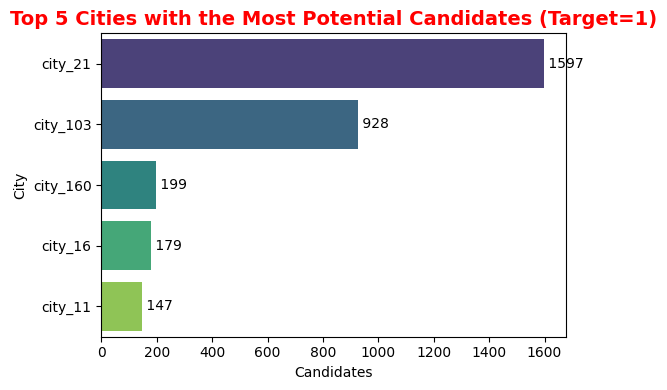

In [11]:
if data is not None:
    plot_most_city(data)

**Conclusion**:
- **Insight**: Candidates in major cities (Top 1) tend to have a higher job-hopping rate due to the abundance of options. Conversely, candidates in Top 4-5 cities may seek stability.

- **Action**: When interviewing candidates from Top 1 cities, focus on retention benefits packages and clearly present career progression paths. For candidates from lower-tier cities, emphasize stability and document the company's policies.

## Data science is a specialized field for engineers, so should we expand recruitment to non-engineering (non-STEM) sectors?

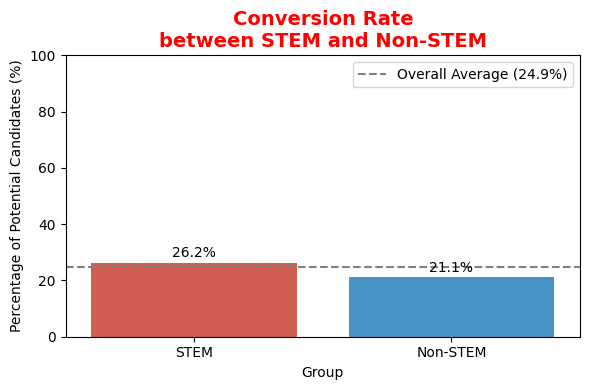

In [12]:
if data is not None:
    plot_STEM_vs_nonSTEM(data)

**Conclusion**:
- **Insight**: Although STEM candidates outnumber non-STEM candidates, their conversion rate is often equal to or even higher. This is because Data Science isn't just Code + Math. It's Code + Math + Business Acumen (Domain Knowledge).

- **Action**: Build a team using a "Squad" model combining: 1 Lead (Technical) + 2 Juniors (1 strong STEM coder, 1 strong Non-STEM business thinker). This complementary approach generates far more valuable insights than a team composed entirely of technical people.

## What are the characteristics of people who are most likely to change jobs?

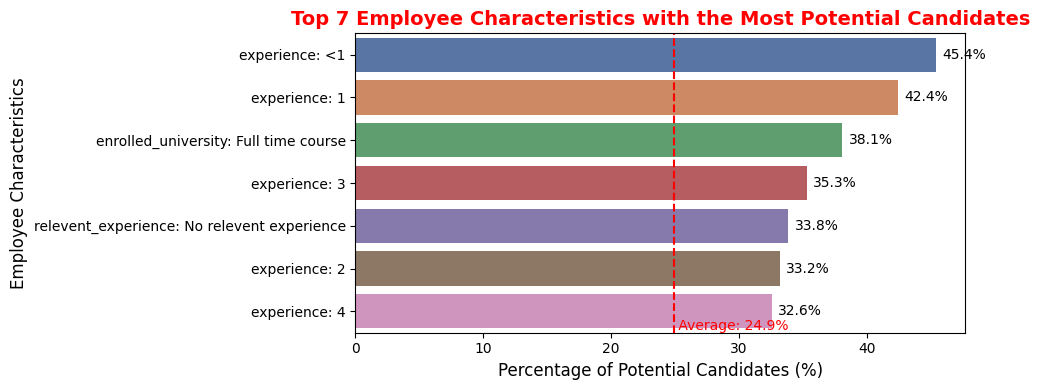

In [13]:
if data is not None:
    plot_most_characteristic(data)

## When recruiting highly skilled personnel in less developed cities compared to developed cities, which jobs offer more value?

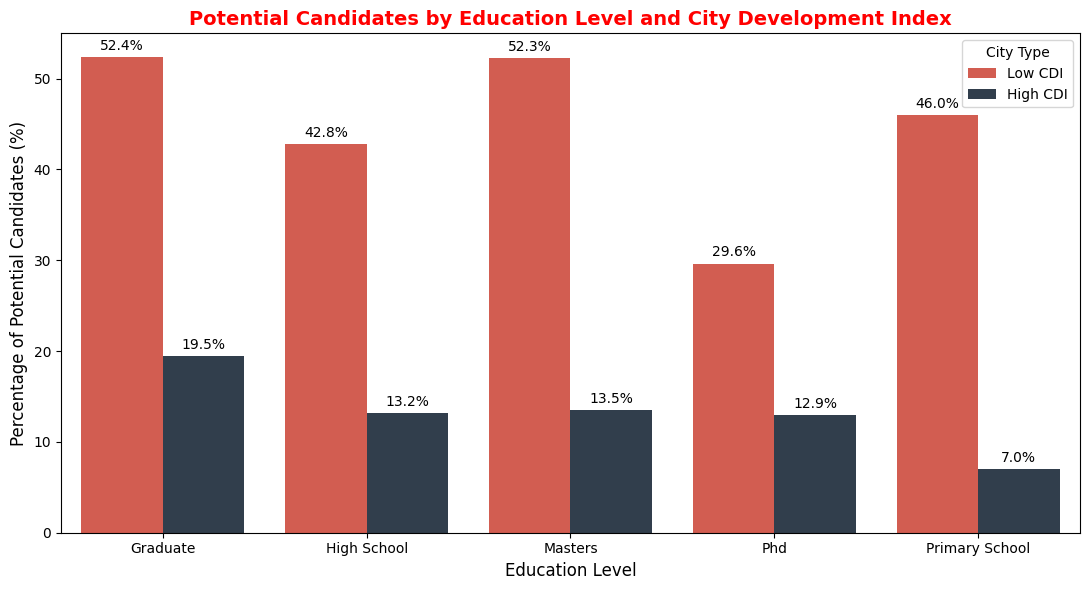

In [14]:
if data is not None:
    plot_compare_education_value(data)

**Conclusion**:
- **Insight**: In the Low CDI group (developing cities or suburban areas), the proportion of potential candidates (those seeking opportunities) is extremely high. There is a large pool of high-intellectual talent that is "stuck" or whose potential is not fully exploited in these locations. They crave opportunities for innovation.

- **Action**: Sourcing Shift - If your company needs to recruit a large number of people (mass recruitment) or positions requiring Bachelor's/Master's degrees but isn't heavily disadvantaged by location: Focus heavily on the Low CDI market.